# Get population and sample

In [5]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()
import seaborn as sbn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [26]:
allruntime= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null  AND mr.numvotes > 40000
  ORDER BY mr.numvotes, mb.runtime_minutes DESC
  ;
""", conn)
#
allruntime


,runtime_minutes,numvotes,averagerating
0,1100.0,5,8.6
1,300.0,5,5.8
2,276.0,5,7.2
3,244.0,5,8.0
4,240.0,5,6.8
...,...,...,...
65715,143.0,1183655,8.1
65716,165.0,1211405,8.4
65717,169.0,1299334,8.6
65718,164.0,1387769,8.4


In [37]:
run_time=list(allruntime["runtime_minutes"])
votes=list(allruntime["numvotes"])
#print(run,rat)


# Correlation between numvotes and averagerating

In [39]:
correlation = np.corrcoef(run_time,votes)
correlation[0][1]

0.1835421594252327

# Covariance between numvotes and averagerating

In [38]:
covariance = np.cov(run_time,votes)
covariance[0][1]

1015710.0714285714

# Mean and standar desviation of population

In [28]:
rmean=sum(run_time)/65720
rstandar=np.std(run)
print("Standar_desviation:", rstandar, "Mean:", rmean)

Standar_desviation: 18.07542077497866 Mean: 94.7322732805843


In [32]:
# mean of votes are 900000
allruntime= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null AND mr.numvotes > 900000
  ORDER BY mr.numvotes, mb.runtime_minutes DESC
  ;
""", conn)
#
allruntime

,runtime_minutes,numvotes,averagerating
0,121.0,948394,8.1
1,138.0,1005960,8.1
2,180.0,1035358,8.2
3,143.0,1183655,8.1
4,165.0,1211405,8.4
5,169.0,1299334,8.6
6,164.0,1387769,8.4
7,148.0,1841066,8.8


# Mean sample

In [35]:
run_time_sample=list(allruntime["runtime_minutes"])
rmean_sample=sum(run_time_sample)/8
rmean_sample

153.5

In [33]:
vm=sum(votes)/11
vst=np.std(votes)
vm

3263608.0

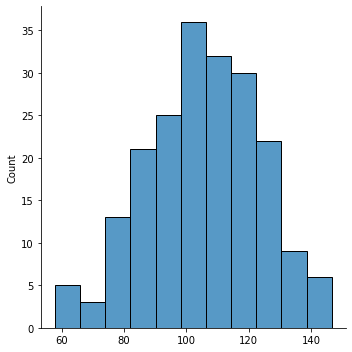

In [46]:
s = np.random.normal(rm, rst, 202)
sbn.displot(s);

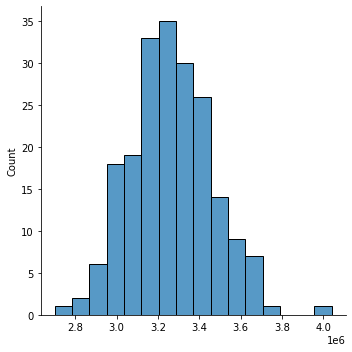

In [45]:
s1 = np.random.normal(vm, vst, 202)
sbn.displot(s1);